# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks



In [2]:
inputs = json_tricks.load('inputs/inputs.json')
inputs1 = json_tricks.load('inputs/inputs2.json')

answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [3]:
for one_input in inputs:
    print(one_input)
    print(ln.lovely(one_input['X']))

OrderedDict([('X', array([[1, 2],
       [3, 4]]))])
array[2, 2] i64 n=4 x∈[1, 4] μ=2.500 σ=1.118 [[1, 2], [3, 4]]
OrderedDict([('X', array([[  4,   0],
       [ -3,  -4],
       [  8,   0],
       [  0,  -7],
       [ -3,  -8],
       [ -9,   1],
       [ -5,  -9],
       [-10,   1]]))])
array[8, 2] i64 n=16 x∈[-10, 8] μ=-2.750 σ=4.969
OrderedDict([('X', array([[-7,  3],
       [ 5,  4],
       [-3,  3]]))])
array[3, 2] i64 n=6 x∈[-7, 5] μ=0.833 σ=4.337 [[-7, 3], [5, 4], [-3, 3]]
OrderedDict([('X', array([[ -4,  -2],
       [-10,   1]]))])
array[2, 2] i64 n=4 x∈[-10, 1] μ=-3.750 σ=4.023 [[-4, -2], [-10, 1]]
OrderedDict([('X', array([[ -8, -10],
       [ -6,  -1],
       [ -4,  -2],
       [ -4,  -2],
       [ -3,   1],
       [ -9, -10],
       [  5,  -6],
       [ -8,   1],
       [ -3,  -8]]))])
array[9, 2] i64 n=18 x∈[-10, 5] μ=-4.278 σ=4.093
OrderedDict([('X', array([[  0,  -4],
       [-10, -10],
       [  9,   2],
       [ -2,  -8],
       [ -4,  -5],
       [ -3,  -2],
       [

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [1]:
def get_lengths(X):
    res = None
    ## YOUR CODE HERE
    return np.linalg.norm(X, axis=0)

In [5]:
answers['lengths'] = [
    get_lengths(**inp) for inp in inputs
]

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [6]:
def get_directions(X):
    norms = np.linalg.norm(X, axis=0) + 1e-8
    return X / norms

In [7]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

(np.int64(0), np.int64(0)) (np.int64(0), np.int64(0)) (np.int64(1), np.int64(2)) (np.int64(3), np.int64(4))
(array([0., 0.]), array([0., 0.])) (array([0., 0.]), array([0., 0.])) (array([1.90083056, 1.80331119]), array([1.16550723, 1.25193125])) (array([0.62196718, 0.86490968]), array([1.62529779, 1.5597013 ]))


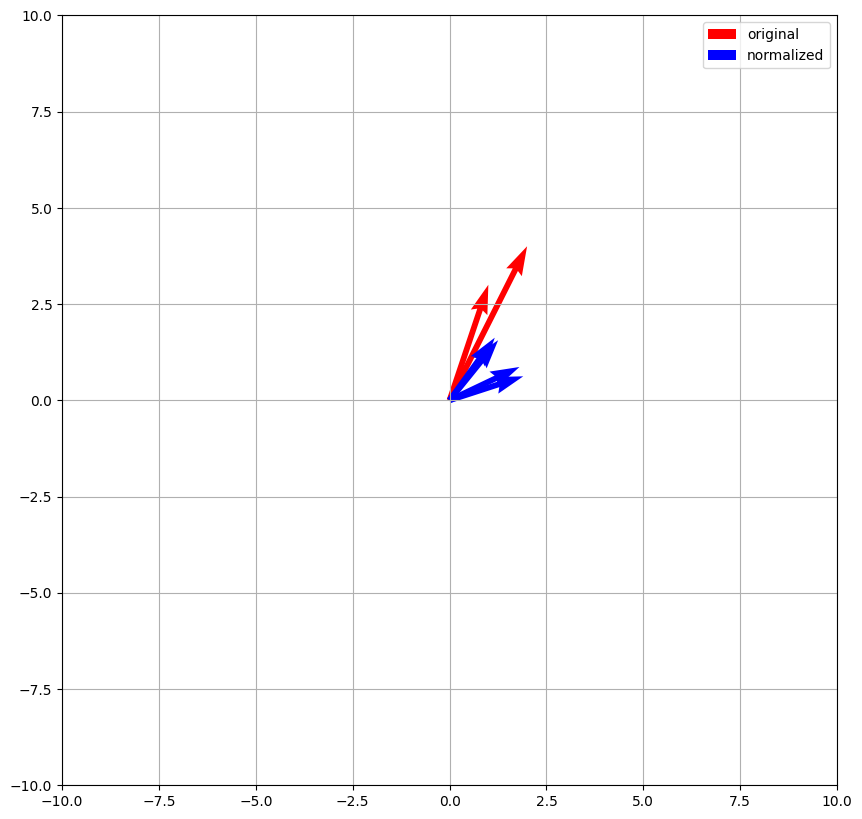

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)

print(X, Y, U, V)

ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['directions'][0]
# Convert angles to unit vectors
U = np.cos(X) * 2
V = np.sin(X) * 2
origins = np.zeros_like(U)
norms = np.stack([origins, origins, U, V], axis=1)
X, Y, U, V = zip(*norms)

print(X, Y, U, V)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()

# Task 4. Scalar Product

Write a function that calculates
- cosine similarity between the vectors ($\cos \theta$)
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [10]:
def get_cosine(X):
    lengths = np.linalg.norm(X, axis=1)
    return np.dot(X[0], X[1]) / (lengths[0] * lengths[1] + 1e-8)

In [11]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]

In [12]:
print(answers['cosine'][0])

0.9838699092199074


# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [13]:
def get_orthonormal(X):
    X = X.astype(np.float32)

    v1 = X[:, 0]
    v1n = v1 / (np.linalg.norm(v1) + 1e-8)

    v2 = X[:, 1]
    proj = np.dot(v2, v1n) * v1n
    v2_orth = v2 - proj
    v2n = v2_orth / (np.linalg.norm(v2_orth) + 1e-8)

    return np.stack([v1n, v2n], axis=1).astype(np.float32)

In [14]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

# 6. Visualization

[[1 2]
 [3 4]]
[[ 0.31622776  0.9486836 ]
 [ 0.94868326 -0.31622675]]


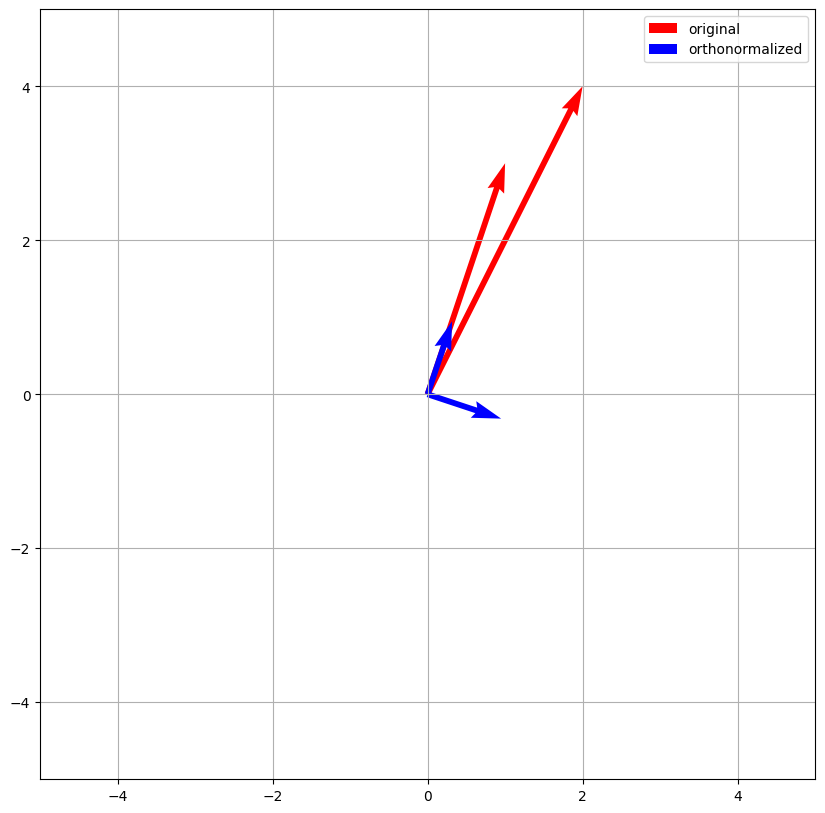

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0]
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.grid()
plt.legend(['original', 'orthonormalized'])
plt.show()


# 7. Saving the answer

In [16]:
json_tricks.dump(answers, '.answer.json')

'{"lengths": [{"__ndarray__": [3.1622776601683795, 4.47213595499958], "dtype": "float64", "shape": [2]}, {"__ndarray__": [17.435595774162696, 14.560219778561036], "dtype": "float64", "shape": [2]}, {"__ndarray__": [9.1104335791443, 5.830951894845301], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.770329614269007, 2.23606797749979], "dtype": "float64", "shape": [2]}, {"__ndarray__": [17.88854381999832, 17.635192088548397], "dtype": "float64", "shape": [2]}, {"__ndarray__": [15.684387141358123, 17.69180601295413], "dtype": "float64", "shape": [2]}, {"__ndarray__": [16.852299546352718, 21.494185260204677], "dtype": "float64", "shape": [2]}, {"__ndarray__": [16.3707055437449, 18.384776310850235], "dtype": "float64", "shape": [2]}, {"__ndarray__": [18.439088914585774, 18.627936010197157], "dtype": "float64", "shape": [2]}, {"__ndarray__": [9.899494936611665, 7.3484692283495345], "dtype": "float64", "shape": [2]}, {"__ndarray__": [15.491933384829668, 13.490737563232042], "dtype": "f